In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/ethanchoi/Desktop/NBA Prediction Model/Points No Zeros.csv')

In [4]:
df.head()

,Rk,Player,Tm,Season PPG,Last 5 PPG,Last 10 PPG,Opp DR,Season MP,Projected MP Today,Today's Points,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,244.0,Aaron Holiday,PHO,6.3,5.2,4.7,114.8,16.2,16.9,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,406.0,Aaron Nesmith,BOS,3.8,6.0,6.4,108.9,11.0,11.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,492.0,Admiral Schofield,ORL,3.8,7.0,6.1,108.4,12.3,20.6,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,250.0,Al Horford,BOS,10.2,14.3,10.7,108.9,29.1,29.1,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85.0,Alec Burks,NYK,11.7,14.0,15.6,109.9,28.6,28.6,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df[['Season PPG', 'Last 5 PPG', 'Last 10 PPG', 'Opp DR', 'Season MP', 'Projected MP Today', "Today's Points"]]

In [6]:
df

,Season PPG,Last 5 PPG,Last 10 PPG,Opp DR,Season MP,Projected MP Today,Today's Points
0,6.3,5.2,4.7,114.8,16.2,16.9,10.0
1,3.8,6.0,6.4,108.9,11.0,11.0,5.0
2,3.8,7.0,6.1,108.4,12.3,20.6,8.0
3,10.2,14.3,10.7,108.9,29.1,29.1,13.0
4,11.7,14.0,15.6,109.9,28.6,28.6,10.0
...,...,...,...,...,...,...,...
600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
603,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.dropna()

In [8]:
df

,Season PPG,Last 5 PPG,Last 10 PPG,Opp DR,Season MP,Projected MP Today,Today's Points
0,6.3,5.2,4.7,114.8,16.2,16.9,10.0
1,3.8,6.0,6.4,108.9,11.0,11.0,5.0
2,3.8,7.0,6.1,108.4,12.3,20.6,8.0
3,10.2,14.3,10.7,108.9,29.1,29.1,13.0
4,11.7,14.0,15.6,109.9,28.6,28.6,10.0
...,...,...,...,...,...,...,...
236,4.8,6.2,7.5,106.2,13.2,22.7,5.0
237,4.3,3.5,2.6,110.2,11.7,11.7,4.0
238,7.8,11.8,10.9,109.1,17.9,17.9,8.0
239,6.6,5.0,5.0,112.8,17.0,24.3,5.0


In [9]:
df.corr()

,Season PPG,Last 5 PPG,Last 10 PPG,Opp DR,Season MP,Projected MP Today,Today's Points
Season PPG,1.000000,0.790133,0.854360,0.144982,0.857432,0.750478,0.442037
Last 5 PPG,0.790133,1.000000,0.942044,0.016307,0.635898,0.600404,0.711569
Last 10 PPG,0.854360,0.942044,1.000000,-0.001126,0.702616,0.640571,0.621075
Opp DR,0.144982,0.016307,-0.001126,1.000000,0.133493,0.077130,0.025930
Season MP,0.857432,0.635898,0.702616,0.133493,1.000000,0.877204,0.337269
Projected MP Today,0.750478,0.600404,0.640571,0.077130,0.877204,1.000000,0.411390
Today's Points,0.442037,0.711569,0.621075,0.025930,0.337269,0.411390,1.000000


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop("Today's Points", axis=1).values
y = df["Today's Points"].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
X_train.shape

(168, 6)

In [14]:
X_test.shape

(73, 6)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(X_train)

MinMaxScaler()

In [18]:
X_train = scaler.transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

In [20]:
X_train.max()

1.0

In [21]:
X_train.min()

0.0

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
model = Sequential()

model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

2022-09-02 13:32:18.824385: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test))

Epoch 1/600
6/6 [==============================] - 0s 24ms/step - loss: 244.0236 - val_loss: 207.0749
Epoch 2/600
6/6 [==============================] - 0s 5ms/step - loss: 242.3120 - val_loss: 205.5760
Epoch 3/600
6/6 [==============================] - 0s 5ms/step - loss: 240.7588 - val_loss: 204.2442
Epoch 4/600
6/6 [==============================] - 0s 5ms/step - loss: 239.3832 - val_loss: 203.0833
Epoch 5/600
6/6 [==============================] - 0s 5ms/step - loss: 238.1839 - val_loss: 202.1187
Epoch 6/600
6/6 [==============================] - 0s 5ms/step - loss: 237.1911 - val_loss: 201.3313
Epoch 7/600
6/6 [==============================] - 0s 6ms/step - loss: 236.4249 - val_loss: 200.6529
Epoch 8/600
6/6 [==============================] - 0s 6ms/step - loss: 235.7301 - val_loss: 200.0319
Epoch 9/600
6/6 [==============================] - 0s 6ms/step - loss: 235.0745 - val_loss: 199.4463
Epoch 10/600
6/6 [==============================] - 0s 6ms/step - loss: 234.4179 - val_los

6/6 [==============================] - 0s 5ms/step - loss: 48.1700 - val_loss: 36.0715
Epoch 83/600
6/6 [==============================] - 0s 5ms/step - loss: 48.1322 - val_loss: 35.7764
Epoch 84/600
6/6 [==============================] - 0s 5ms/step - loss: 48.0772 - val_loss: 35.7167
Epoch 85/600
6/6 [==============================] - 0s 5ms/step - loss: 48.0350 - val_loss: 35.7194
Epoch 86/600
6/6 [==============================] - 0s 5ms/step - loss: 47.9308 - val_loss: 35.8847
Epoch 87/600
6/6 [==============================] - 0s 5ms/step - loss: 47.8704 - val_loss: 36.0619
Epoch 88/600
6/6 [==============================] - 0s 5ms/step - loss: 47.9564 - val_loss: 36.5577
Epoch 89/600
6/6 [==============================] - 0s 5ms/step - loss: 47.8111 - val_loss: 36.5594
Epoch 90/600
6/6 [==============================] - 0s 5ms/step - loss: 47.7692 - val_loss: 36.4458
Epoch 91/600
6/6 [==============================] - 0s 5ms/step - loss: 47.7147 - val_loss: 36.1914
Epoch 92/600


6/6 [==============================] - 0s 5ms/step - loss: 44.8471 - val_loss: 31.9219
Epoch 164/600
6/6 [==============================] - 0s 5ms/step - loss: 44.8426 - val_loss: 31.9439
Epoch 165/600
6/6 [==============================] - 0s 5ms/step - loss: 44.7996 - val_loss: 31.8762
Epoch 166/600
6/6 [==============================] - 0s 5ms/step - loss: 44.7943 - val_loss: 31.8093
Epoch 167/600
6/6 [==============================] - 0s 5ms/step - loss: 44.7095 - val_loss: 32.0666
Epoch 168/600
6/6 [==============================] - 0s 5ms/step - loss: 44.6493 - val_loss: 32.1616
Epoch 169/600
6/6 [==============================] - 0s 5ms/step - loss: 44.6040 - val_loss: 32.2523
Epoch 170/600
6/6 [==============================] - 0s 5ms/step - loss: 44.6231 - val_loss: 32.4996
Epoch 171/600
6/6 [==============================] - 0s 5ms/step - loss: 44.5427 - val_loss: 32.5427
Epoch 172/600
6/6 [==============================] - 0s 5ms/step - loss: 44.5105 - val_loss: 32.7097
Epoc

6/6 [==============================] - 0s 6ms/step - loss: 41.9956 - val_loss: 30.4573
Epoch 245/600
6/6 [==============================] - 0s 5ms/step - loss: 41.9626 - val_loss: 30.5387
Epoch 246/600
6/6 [==============================] - 0s 5ms/step - loss: 41.9238 - val_loss: 30.5717
Epoch 247/600
6/6 [==============================] - 0s 5ms/step - loss: 41.8799 - val_loss: 30.3875
Epoch 248/600
6/6 [==============================] - 0s 5ms/step - loss: 41.8270 - val_loss: 30.1169
Epoch 249/600
6/6 [==============================] - 0s 5ms/step - loss: 41.8147 - val_loss: 30.1628
Epoch 250/600
6/6 [==============================] - 0s 5ms/step - loss: 41.7741 - val_loss: 30.0617
Epoch 251/600
6/6 [==============================] - 0s 5ms/step - loss: 41.7432 - val_loss: 29.7908
Epoch 252/600
6/6 [==============================] - 0s 5ms/step - loss: 41.6462 - val_loss: 29.5185
Epoch 253/600
6/6 [==============================] - 0s 5ms/step - loss: 41.6209 - val_loss: 29.2491
Epoc

6/6 [==============================] - 0s 5ms/step - loss: 39.1208 - val_loss: 27.5815
Epoch 326/600
6/6 [==============================] - 0s 5ms/step - loss: 39.0822 - val_loss: 27.0717
Epoch 327/600
6/6 [==============================] - 0s 5ms/step - loss: 39.0294 - val_loss: 26.7305
Epoch 328/600
6/6 [==============================] - 0s 5ms/step - loss: 39.0727 - val_loss: 26.4512
Epoch 329/600
6/6 [==============================] - 0s 5ms/step - loss: 39.0211 - val_loss: 26.6775
Epoch 330/600
6/6 [==============================] - 0s 5ms/step - loss: 38.9473 - val_loss: 26.7699
Epoch 331/600
6/6 [==============================] - 0s 5ms/step - loss: 38.8902 - val_loss: 26.9687
Epoch 332/600
6/6 [==============================] - 0s 5ms/step - loss: 38.9110 - val_loss: 27.3085
Epoch 333/600
6/6 [==============================] - 0s 5ms/step - loss: 38.8503 - val_loss: 27.4666
Epoch 334/600
6/6 [==============================] - 0s 5ms/step - loss: 38.8027 - val_loss: 27.6853
Epoc

6/6 [==============================] - 0s 6ms/step - loss: 36.6886 - val_loss: 24.6422
Epoch 407/600
6/6 [==============================] - 0s 6ms/step - loss: 36.5729 - val_loss: 25.0721
Epoch 408/600
6/6 [==============================] - 0s 6ms/step - loss: 36.5125 - val_loss: 25.5648
Epoch 409/600
6/6 [==============================] - 0s 6ms/step - loss: 36.4724 - val_loss: 26.1669
Epoch 410/600
6/6 [==============================] - 0s 6ms/step - loss: 36.4565 - val_loss: 26.7450
Epoch 411/600
6/6 [==============================] - 0s 5ms/step - loss: 36.4722 - val_loss: 26.8138
Epoch 412/600
6/6 [==============================] - 0s 5ms/step - loss: 36.4588 - val_loss: 26.6973
Epoch 413/600
6/6 [==============================] - 0s 5ms/step - loss: 36.3944 - val_loss: 26.3912
Epoch 414/600
6/6 [==============================] - 0s 5ms/step - loss: 36.3399 - val_loss: 26.1460
Epoch 415/600
6/6 [==============================] - 0s 6ms/step - loss: 36.3201 - val_loss: 25.6609
Epoc

6/6 [==============================] - 0s 6ms/step - loss: 34.5288 - val_loss: 23.6613
Epoch 488/600
6/6 [==============================] - 0s 5ms/step - loss: 34.5825 - val_loss: 23.2146
Epoch 489/600
6/6 [==============================] - 0s 5ms/step - loss: 34.6369 - val_loss: 23.2776
Epoch 490/600
6/6 [==============================] - 0s 5ms/step - loss: 34.5587 - val_loss: 23.6666
Epoch 491/600
6/6 [==============================] - 0s 5ms/step - loss: 34.4913 - val_loss: 23.8371
Epoch 492/600
6/6 [==============================] - 0s 5ms/step - loss: 34.4714 - val_loss: 24.3052
Epoch 493/600
6/6 [==============================] - 0s 5ms/step - loss: 34.3422 - val_loss: 24.4760
Epoch 494/600
6/6 [==============================] - 0s 5ms/step - loss: 34.3087 - val_loss: 24.5161
Epoch 495/600
6/6 [==============================] - 0s 6ms/step - loss: 34.2882 - val_loss: 24.6221
Epoch 496/600
6/6 [==============================] - 0s 6ms/step - loss: 34.2712 - val_loss: 24.5694
Epoc

6/6 [==============================] - 0s 6ms/step - loss: 32.9860 - val_loss: 24.3475
Epoch 569/600
6/6 [==============================] - 0s 7ms/step - loss: 32.8803 - val_loss: 24.6246
Epoch 570/600
6/6 [==============================] - 0s 6ms/step - loss: 32.8572 - val_loss: 24.7949
Epoch 571/600
6/6 [==============================] - 0s 5ms/step - loss: 32.8315 - val_loss: 25.0172
Epoch 572/600
6/6 [==============================] - 0s 5ms/step - loss: 32.8267 - val_loss: 25.0879
Epoch 573/600
6/6 [==============================] - 0s 5ms/step - loss: 32.7953 - val_loss: 24.9772
Epoch 574/600
6/6 [==============================] - 0s 5ms/step - loss: 32.7986 - val_loss: 24.9077
Epoch 575/600
6/6 [==============================] - 0s 5ms/step - loss: 32.7451 - val_loss: 25.5180
Epoch 576/600
6/6 [==============================] - 0s 5ms/step - loss: 32.8120 - val_loss: 25.9157
Epoch 577/600
6/6 [==============================] - 0s 5ms/step - loss: 32.7082 - val_loss: 25.2471
Epoc

In [25]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

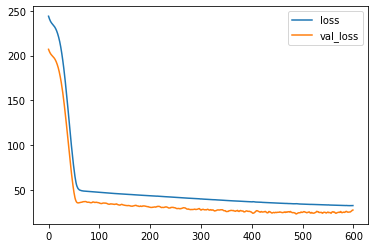

In [26]:
losses.plot()

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score

In [28]:
predictions = model.predict(X_test)

3/3 [==============================] - 0s 1ms/step


In [29]:
mean_squared_error(y_test,predictions)

27.528007555121153

In [30]:
model.evaluate(X_test, y_test, verbose=0)

27.52800750732422

In [31]:
model.evaluate(X_train, y_train, verbose=0)

32.52951431274414

In [32]:
predictions

array([[ 7.4368587],
       [16.573132 ],
       [ 4.823219 ],
       [10.748801 ],
       [11.886495 ],
       [12.440593 ],
       [ 5.865034 ],
       [33.57736  ],
       [12.072029 ],
       [ 6.0924926],
       [ 8.599006 ],
       [ 8.27779  ],
       [10.638844 ],
       [ 9.436835 ],
       [24.328909 ],
       [41.118977 ],
       [14.144462 ],
       [15.1200075],
       [10.645242 ],
       [ 6.150387 ],
       [ 8.168199 ],
       [ 7.9736137],
       [26.406515 ],
       [12.825786 ],
       [ 8.234953 ],
       [ 6.7322507],
       [ 3.5443583],
       [11.82043  ],
       [14.94581  ],
       [26.270552 ],
       [11.966598 ],
       [11.960028 ],
       [12.946995 ],
       [15.603886 ],
       [22.391735 ],
       [10.457132 ],
       [14.476869 ],
       [ 7.867947 ],
       [34.57263  ],
       [14.5824   ],
       [22.445267 ],
       [ 9.720267 ],
       [ 4.372938 ],
       [18.88223  ],
       [17.61492  ],
       [16.771568 ],
       [ 5.9468427],
       [16.22

In [33]:
predictions = pd.Series(predictions.reshape(73,))

In [34]:
predictions

0      7.436859
1     16.573132
2      4.823219
3     10.748801
4     11.886495
        ...    
68    13.925122
69    14.415050
70    10.663490
71    18.085897
72     9.270490
Length: 73, dtype: float32

In [35]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [37]:
pred_df=pd.concat([pred_df,predictions],axis=1)

In [38]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [39]:
pred_df

,Test True Y,Model Predictions
0,6.0,7.436859
1,35.0,16.573132
2,3.0,4.823219
3,14.0,10.748801
4,5.0,11.886495
...,...,...
68,20.0,13.925122
69,20.0,14.415050
70,16.0,10.663490
71,8.0,18.085897


<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

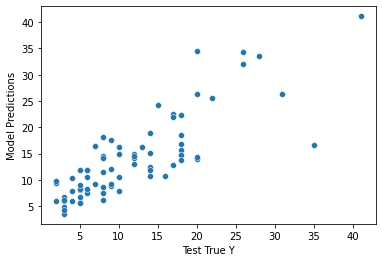

In [40]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

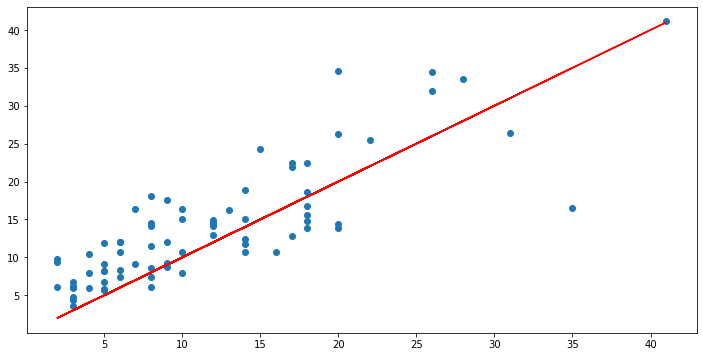

In [41]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test,y_test,'r')

In [42]:
mean_absolute_error(y_test,predictions)

4.140023146590141

In [43]:
df["Today's Points"].describe()

count    241.000000
mean      12.709544
std        8.192900
min        2.000000
25%        7.000000
50%       11.000000
75%       17.000000
max       42.000000
Name: Today's Points, dtype: float64

In [44]:
explained_variance_score(y_test, predictions)

0.6611291472002158

In [45]:
single_player = df.drop("Today's Points", axis=1).iloc[0]

In [47]:
single_player = scaler.transform(single_player.values.reshape(-1,6))

In [49]:
model.predict(single_player)

1/1 [==============================] - 0s 31ms/step


array([[7.77626]], dtype=float32)

In [50]:
df.head()

,Season PPG,Last 5 PPG,Last 10 PPG,Opp DR,Season MP,Projected MP Today,Today's Points
0,6.3,5.2,4.7,114.8,16.2,16.9,10.0
1,3.8,6.0,6.4,108.9,11.0,11.0,5.0
2,3.8,7.0,6.1,108.4,12.3,20.6,8.0
3,10.2,14.3,10.7,108.9,29.1,29.1,13.0
4,11.7,14.0,15.6,109.9,28.6,28.6,10.0
